<a href="https://colab.research.google.com/github/santhoshBjeeffy/NLp_Practice/blob/master/Attention_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Attention Basics

Inputs to the scoring function¶
Let's start by looking at the inputs we'll give to the scoring function. We will assume we're in the first step in the decoging phase. The first input to the scoring function is the hidden state of decoder (assuming a toy RNN with three hidden nodes -- not usable in real life, but easier to illustrate):

In [0]:
dec_hidden_state=[5,1,23]

In [0]:
#lets visualize this vector
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

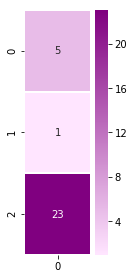

In [5]:
#lets visualize our decoder hidden state
plt.figure(figsize=(1.5,4.5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)), annot=True,cmap=sns.light_palette("purple",as_cmap=True),linewidths=1)

In [0]:
#Our first scoring function will score a single annotation (encoder hidden state), which looks like this:
annotation=[3,12,15]  #Eg: encoder hidden state

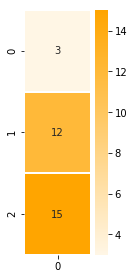

In [9]:
#lets visualize the single anotation
plt.figure(figsize=(1.5,4.5))
sns.heatmap(np.transpose(np.matrix(annotation)), annot=True,cmap=sns.light_palette("orange",as_cmap=True),linewidths=1)


IMPLEMENT: Scoring a Single Annotation

Let's calculate the dot product of a single annotation. Numpy's dot() is a good candidate for this operation

In [10]:
def single_attention(dec_hidden_state,enc_hidden_state):
  return np.dot(dec_hidden_state,enc_hidden_state)

single_attention(dec_hidden_state,annotation)

372

#Annotation matrix
Let's now look at scoring all the annotations at once. To do that, here's our annotation matrix:



In [0]:
annotations = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])

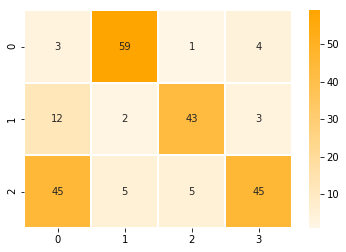

In [13]:
#visualize
ax = sns.heatmap(annotations, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)


#IMPLEMENT: Scoring All Annotations at Once
Let's calculate the scores of all the annotations in one step using matrix multiplication. Let's continue to us the dot scoring method



To do that, we'll have to transpose dec_hidden_state and matrix multiply it with annotations.

In [16]:
def dot_attention_score(dec_hidden_state,annotations):
      # TODO: return the product of dec_hidden_state transpose and enc_hidden_states
  return np.matmul(np.transpose(dec_hidden_state),annotations)

attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)
attention_weights_raw

array([1062. ,  412. ,  163. , 1064.9])

Looking at these scores, can you guess which of the four vectors will get the most attention from the decoder at this time step?



#Softmax

Now that we have our scores, let's apply softmax:

In [18]:
def softmax(x):
  x=np.array(x, dtype=np.float128)
  e_x=np.exp(x)
  return e_x / e_x.sum(axis=0)

attention_weights=softmax(attention_weights_raw)
attention_weights

array([5.21535631e-002, 2.66606508e-284, 1.93439318e-392, 9.47846437e-001],
      dtype=float128)


Even when knowing which annotation will get the most focus, it's interesting to see how drastic softmax makes the end score become. The first and last annotation had the respective scores of 927 and 929. But after softmax, the attention they'll get is 0.12 and 0.88 respectively.

#Applying the scores back on the annotations¶

Now that we have our scores, let's multiply each annotation by its score to proceed closer to the attention context vector. This is the multiplication part of this formula (we'll tackle the summation part in the latter cells)



In [19]:
def apply_attention_scores(attention_weights, annotations):
    # TODO: Multiple the annotations by their weights
    return attention_weights * annotations

applied_attention = apply_attention_scores(attention_weights, annotations)
applied_attention

array([[1.56460689e-001, 1.57297840e-282, 1.93439318e-392,
        3.79138575e+000],
       [6.25842757e-001, 5.33213017e-284, 8.31789069e-391,
        2.84353931e+000],
       [2.34691034e+000, 1.33303254e-283, 9.67196592e-392,
        4.29374436e+001]], dtype=float128)

Let's visualize how the context vector looks now that we've applied the attention scores back on it:



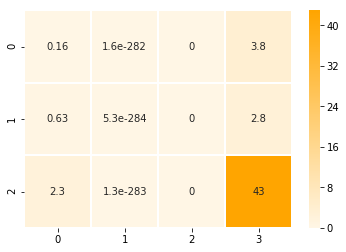

In [20]:
# Let's visualize our annotations after applying attention to them
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

Contrast this with the raw annotations visualized earlier in the notebook, and we can see that the second and third annotations (columns) have been nearly wiped out. The first annotation maintains some of its value, and the fourth annotation is the most pronounced.

#Calculating the Attention Context Vector¶
All that remains to produce our attention context vector now is to sum up the four columns to produce a single attention context vector



In [21]:
def calculate_attention_Vector(applied_attention):
  return np.sum(applied_attention,axis=1)

attention_vector=calculate_attention_Vector(applied_attention)
attention_vector

array([ 3.94784644,  3.46938207, 45.28435393], dtype=float128)

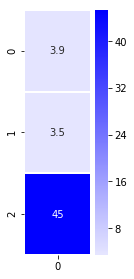

In [22]:
# Let's visualize the attention context vector
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)


Now that we have the context vector, we can concatinate it with the hidden state and pass it through a hidden layer to produce the the result of this decoding time step.